# Numerical Data Analysis – Socioeconomic Dataset

**MSc in Digital Humanities – Data Analytics**

**Second Assignment – Exploratory Analysis on Numerical Data**

Instructor: Sotirios Gyftopoulos


## Introduction

In this notebook you will perform **Exploratory Data Analysis (EDA)** on a small
*socioeconomic* dataset.

You will:

- load and inspect data in a CSV format,
- clean and preprocess the data (missing values, outliers),
- compute descriptive statistics (mean, median, variance, standard deviation),
- explore relationships between variables (correlations),
- fit simple and multiple linear regression models,
- apply Principal Component Analysis (PCA),
- apply clustering (k-means) and interpret the clusters.

At the end, you will write a short report summarizing your findings.


# Step 1. Load the libraries

All necessary libraries are loaded

In [1]:
# 2. Setup and imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from io import StringIO


## Step 2. Load the dataset

The data are defined in the variable ```csv_data``` in a CSV format. The data have the following columns:

- `id`
- `age`
- `income`
- `education_years`
- `weekly_work_hours`
- `health_index`
- `satisfaction_score`
- `monthly_expenditure`
- `savings`
- `commute_time_minutes`


In [2]:
# Define the CSV data
csv_data = """
id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
1,34,28500,14,40,0.78,6,1800,5000,45
2,51,42000,16,50,0.66,7,2400,12000,30
3,22,15000,12,20,0.92,8,900,2000,10
4,47,38000,18,55,0.74,5,2600,8000,25
5,29,32000,30,38,0.81,7,1700,6000,50
6,63,29000,10,25,0.51,6,1500,4000,60
7,41,51000,19,45,0.69,7,3000,15000,35
8,24,18000,13,30,0.88,9,1100,2500,15
9,38,45000,17,48,0.73,6,2300,10000,40
10,55,52000,16,52,0.62,5,2800,16000,20
11,31,30000,1,42,0.79,7,1900,5500,55
12,27,25000,12,36,0.84,8,1500,3000,45
13,49,47000,18,50,0.65,6,2600,11000,30
14,36,33000,15,41,0.77,7,2000,7000,25
15,58,28000,11,30,0.58,5,1600,3500,70
16,23,16000,32,22,0.9,9,1000,2200,12
17,44,39000,16,46,0.72,6,2100,9500,38
18,33,31000,14,40,0.8,7,1750,5500,48
19,61,53000,17,50,0.55,5,2900,17000,30
20,28,22000,13,34,0.86,8,1400,2800,20
21,35,36000,15,39,0.79,7,1850,6800,42
22,52,41000,16,48,0.64,5,2450,11500,33
23,40,46000,18,50,0.71,6,2500,12000,37
24,26,21000,12,32,0.89,9,1300,2600,18
25,57,30000,3,28,0.6,5,1550,3800,75
26,32,35000,14,41,0.78,7,1950,6200,52
27,48,48000,17,49,0.68,6,2550,13000,28
28,30,27000,13,37,0.82,8,1650,5000,40
29,45,50000,19,51,0.7,7,2750,14000,32
30,21,17000,12,24,0.87,9,1200,2400,14
"""

# Read the CSV data

df = pd.read_csv(StringIO(csv_data))

# Show the first rows
df.head()


,id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
0,1,34,28500,14,40,0.78,6,1800,5000,45
1,2,51,42000,16,50,0.66,7,2400,12000,30
2,3,22,15000,12,20,0.92,8,900,2000,10
3,4,47,38000,18,55,0.74,5,2600,8000,25
4,5,29,32000,30,38,0.81,7,1700,6000,50


## Step 3. Basic information for the data

Compute and show some basic information of the data


In [3]:
# Basic information about the dataset

print("Shape (rows, columns):", df.shape)
print("\nColumn types:")
print(df.dtypes)

print("\nSummary statistics:")
df.describe()


Shape (rows, columns): (30, 10)

Column types:
id                        int64
age                       int64
income                    int64
education_years           int64
weekly_work_hours         int64
health_index            float64
satisfaction_score        int64
monthly_expenditure       int64
savings                   int64
commute_time_minutes      int64
dtype: object

Summary statistics:


,id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,15.500000,39.333333,34183.333333,15.100000,39.766667,0.742667,6.766667,1953.333333,7493.333333,35.80000
std,8.803408,12.499195,11489.487949,5.932668,9.901875,0.109448,1.304722,598.983814,4598.795444,16.50162
min,1.000000,21.000000,15000.000000,1.000000,20.000000,0.510000,5.000000,900.000000,2000.000000,10.00000
25%,8.250000,29.250000,27250.000000,12.250000,32.500000,0.665000,6.000000,1512.500000,3575.000000,25.00000
50%,15.500000,37.000000,32500.000000,15.000000,40.500000,0.755000,7.000000,1875.000000,6100.000000,34.00000
75%,22.750000,48.750000,44250.000000,17.000000,48.750000,0.817500,7.750000,2487.500000,11375.000000,45.00000
max,30.000000,63.000000,53000.000000,32.000000,55.000000,0.920000,9.000000,3000.000000,17000.000000,75.00000


## Step 4. Box plot

Show the data of a feature (i.e., *column*) in a box plot. The code below shows the box plot of `education_years` but you can change the `my_feature` variable to one of the following:


*   `id`
*   `age`
*   `income`
*   `education_years`
*   `weekly_work_hours`
*   `health_index`
*   `satisfaction_score`
*   `monthly_expenditure`
*   `savings`
*   `commute_time_minutes`




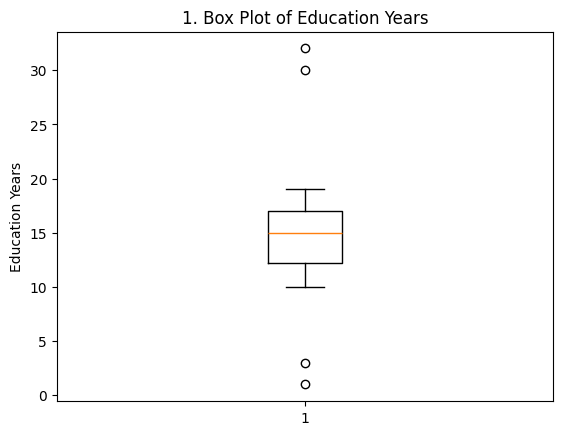

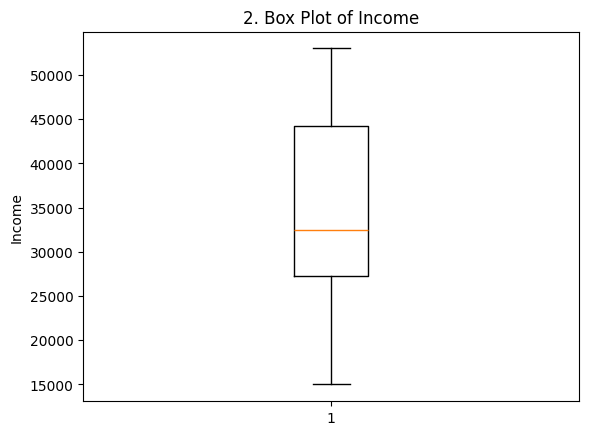

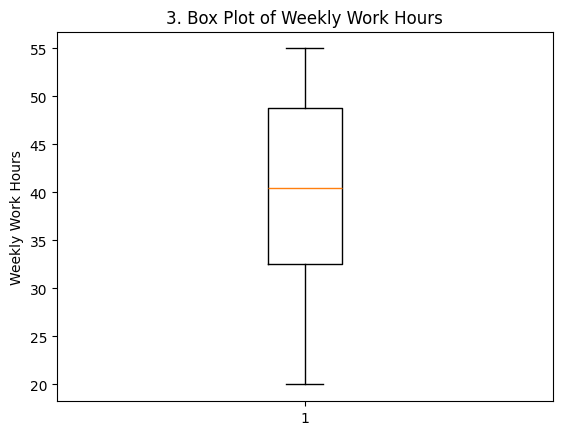

In [4]:
my_feature = "education_years"
my_title = "1. Box Plot of Education Years"
my_label = "Education Years"

# Create a box plot

plt.boxplot(df[my_feature])
plt.title(my_title)
plt.ylabel(my_label)
plt.show()

my_feature_1 = "income"
my_title_1 = "2. Box Plot of Income"
my_label_1 = "Income"

# Create a box plot

plt.boxplot(df[my_feature_1])
plt.title(my_title_1)
plt.ylabel(my_label_1)
plt.show()

my_feature_2 = "weekly_work_hours"
my_title_2 = "3. Box Plot of Weekly Work Hours"
my_label_2 = "Weekly Work Hours"

# Create a box plot

plt.boxplot(df[my_feature_2])
plt.title(my_title_2)
plt.ylabel(my_label_2)
plt.show()

## Step 5. Data cleaning 1/2

Before any analysis, we will check for **outliers** using the Interquartile Range (IQR) method. First we detect the outliers.


In [5]:
# Detect outliers using the IQR method for each numeric column (except 'id')

numeric_cols = [col for col in df.columns if col != "id"]

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bounds:\n", lower_bound)
print("\nUpper bounds:\n", upper_bound)

# Boolean mask for rows that contain at least one outlier
outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)

print("\nNumber of rows with at least one potential outlier:", outlier_mask.sum())
df[outlier_mask]


Lower bounds:
 age                        0.00000
income                  1750.00000
education_years            5.12500
weekly_work_hours          8.12500
health_index               0.43625
satisfaction_score         3.37500
monthly_expenditure       50.00000
savings                -8125.00000
commute_time_minutes      -5.00000
dtype: float64

Upper bounds:
 age                        78.00000
income                  69750.00000
education_years            24.12500
weekly_work_hours          73.12500
health_index                1.04625
satisfaction_score         10.37500
monthly_expenditure      3950.00000
savings                 23075.00000
commute_time_minutes       75.00000
dtype: float64

Number of rows with at least one potential outlier: 4


,id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
4,5,29,32000,30,38,0.81,7,1700,6000,50
10,11,31,30000,1,42,0.79,7,1900,5500,55
15,16,23,16000,32,22,0.90,9,1000,2200,12
24,25,57,30000,3,28,0.60,5,1550,3800,75


## Step 6. Data cleaning 2/2

Then we reset the outliers to the bounds of the IQR.

In [6]:
# Create a copy of the DataFrame to apply outlier capping
df_capped = df.copy()

# Apply winsorization (capping) to replace outliers with IQR bounds
for col in numeric_cols:
    df_capped[col] = df_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])

df = df_capped.copy()

print("DataFrame after capping outliers:")
display(df.head())

DataFrame after capping outliers:


,id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
0,1,34,28500,14.000,40,0.78,6,1800,5000,45
1,2,51,42000,16.000,50,0.66,7,2400,12000,30
2,3,22,15000,12.000,20,0.92,8,900,2000,10
3,4,47,38000,18.000,55,0.74,5,2600,8000,25
4,5,29,32000,24.125,38,0.81,7,1700,6000,50


# Step 7. Box plot

Let's see the values of the feature ```education_years``` in the form of a box plot after the outliers have been reset.

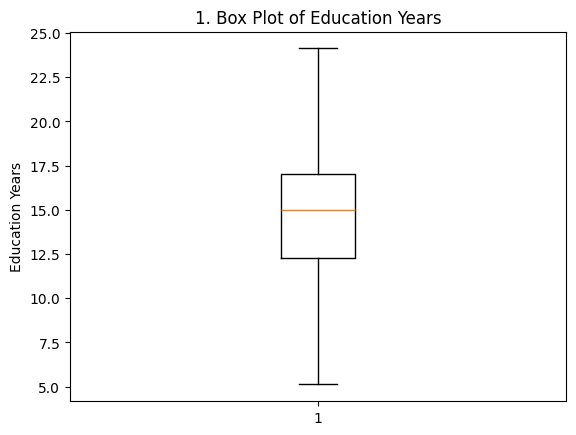

In [ ]:
my_feature = "education_years"
my_title = "1. Box Plot of Education Years"
my_label = "Education Years"

# Create a box plot

plt.boxplot(df[my_feature])
plt.title(my_title)
plt.ylabel(my_label)
plt.show()

## Step 8. Univariate Analysis

We will compute:

- **Measures of central tendency**: mean, median, mode  
- **Measures of spread**: variance, standard deviation, IQR  

and inspect the distributions with simple visualizations.


In [7]:
from scipy import stats

for col in numeric_cols:
    print(f"\n=== {col} ===")
    col_data = df[col]
    mean_val = col_data.mean()
    median_val = col_data.median()
    mode_val = stats.mode(col_data, keepdims=True)[0][0]
    var_val = col_data.var()
    std_val = col_data.std()
    q1 = col_data.quantile(0.25)
    q3 = col_data.quantile(0.75)
    iqr_val = q3 - q1

    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Mode: {mode_val}")
    print(f"Variance: {var_val:.2f}")
    print(f"Standard Deviation: {std_val:.2f}")
    print(f"IQR: {iqr_val:.2f}")



=== age ===
Mean: 39.33
Median: 37.00
Mode: 21
Variance: 156.23
Standard Deviation: 12.50
IQR: 19.50

=== income ===
Mean: 34183.33
Median: 32500.00
Mode: 30000
Variance: 132008333.33
Standard Deviation: 11489.49
IQR: 17000.00

=== education_years ===
Mean: 14.85
Median: 15.00
Mode: 12.0
Variance: 18.20
Standard Deviation: 4.27
IQR: 4.75

=== weekly_work_hours ===
Mean: 39.77
Median: 40.50
Mode: 50
Variance: 98.05
Standard Deviation: 9.90
IQR: 16.25

=== health_index ===
Mean: 0.74
Median: 0.76
Mode: 0.78
Variance: 0.01
Standard Deviation: 0.11
IQR: 0.15

=== satisfaction_score ===
Mean: 6.77
Median: 7.00
Mode: 7
Variance: 1.70
Standard Deviation: 1.30
IQR: 1.75

=== monthly_expenditure ===
Mean: 1953.33
Median: 1875.00
Mode: 1500
Variance: 358781.61
Standard Deviation: 598.98
IQR: 975.00

=== savings ===
Mean: 7493.33
Median: 6100.00
Mode: 5000
Variance: 21148919.54
Standard Deviation: 4598.80
IQR: 7800.00

=== commute_time_minutes ===
Mean: 35.80
Median: 34.00
Mode: 30
Variance: 272

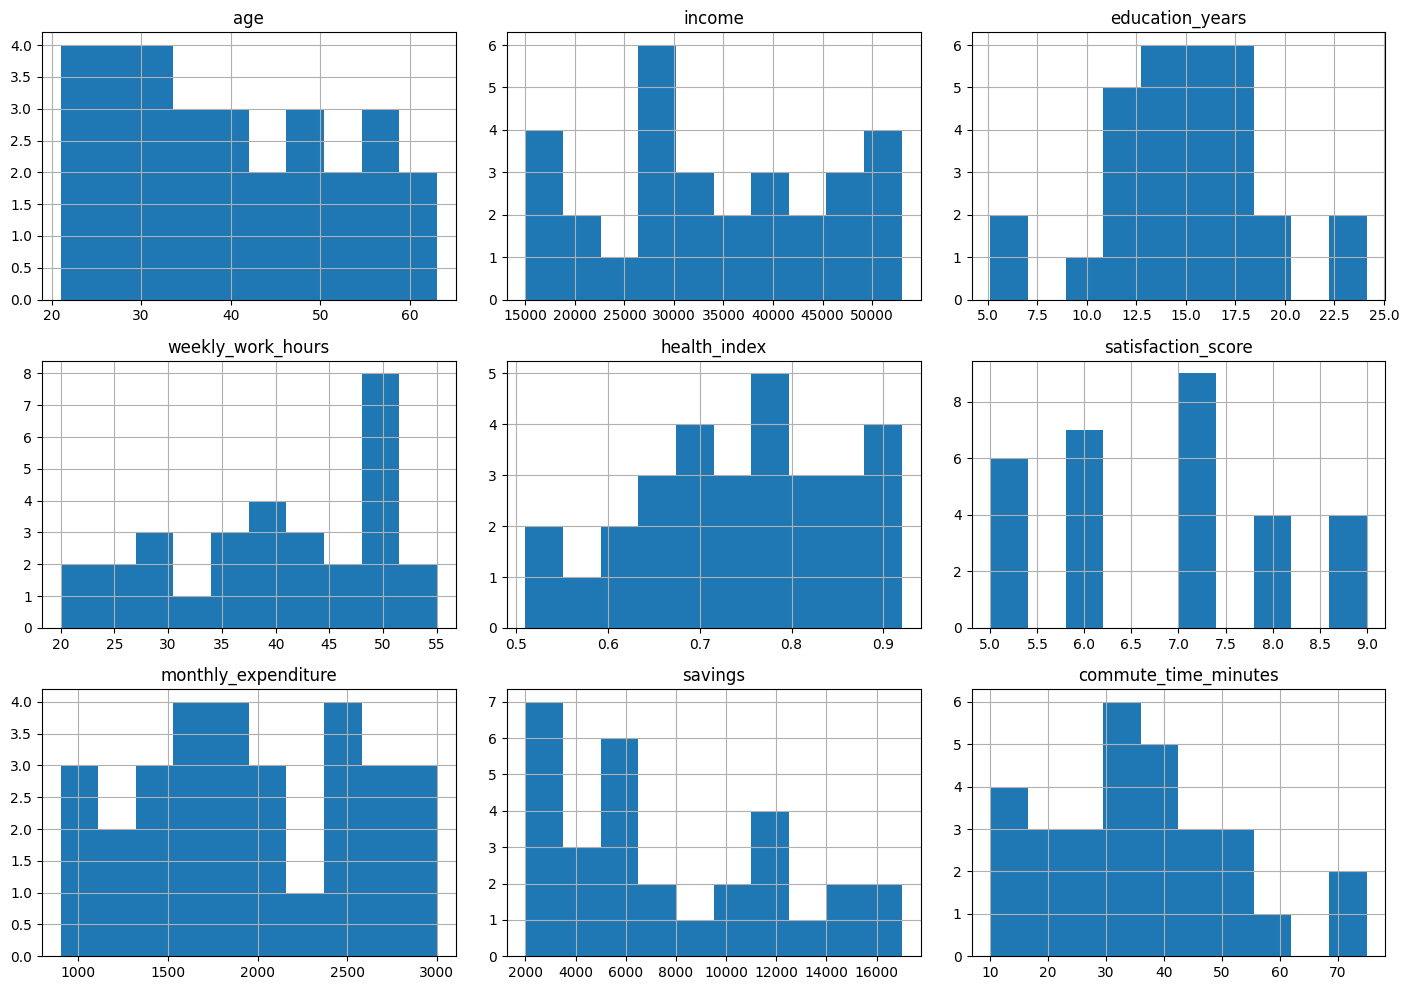

In [8]:
# Histograms for numeric variables

df[numeric_cols].hist(figsize=(14, 10), bins=10)
plt.tight_layout()
plt.show()

## Step 9. Bivariate Analysis and Correlations

We are now interested in **relationships between pairs of variables**.

We will:

- compute correlation coefficients (Pearson, Spearman, Kendall),
- generate a **correlation matrix**,
- visualize it with a heatmap.


In [9]:
# Pearson correlation matrix for numeric variables

corr_matrix = df[numeric_cols].corr(method="pearson")
corr_matrix


,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
age,1.000000,0.658795,-0.043647,0.443089,-0.979188,-0.857771,0.615642,0.590817,0.414448
income,0.658795,1.000000,0.381847,0.880284,-0.678814,-0.676785,0.972834,0.962338,0.109780
education_years,-0.043647,0.381847,1.000000,0.383792,0.053870,-0.000310,0.381976,0.445354,-0.407451
weekly_work_hours,0.443089,0.880284,0.383792,1.000000,-0.425135,-0.567542,0.921643,0.845588,-0.017389
health_index,-0.979188,-0.678814,0.053870,-0.425135,1.000000,0.840019,-0.624230,-0.601408,-0.487705
satisfaction_score,-0.857771,-0.676785,-0.000310,-0.567542,0.840019,1.000000,-0.654203,-0.571518,-0.481124
monthly_expenditure,0.615642,0.972834,0.381976,0.921643,-0.624230,-0.654203,1.000000,0.952395,0.037399
savings,0.590817,0.962338,0.445354,0.845588,-0.601408,-0.571518,0.952395,1.000000,-0.093850
commute_time_minutes,0.414448,0.109780,-0.407451,-0.017389,-0.487705,-0.481124,0.037399,-0.093850,1.000000


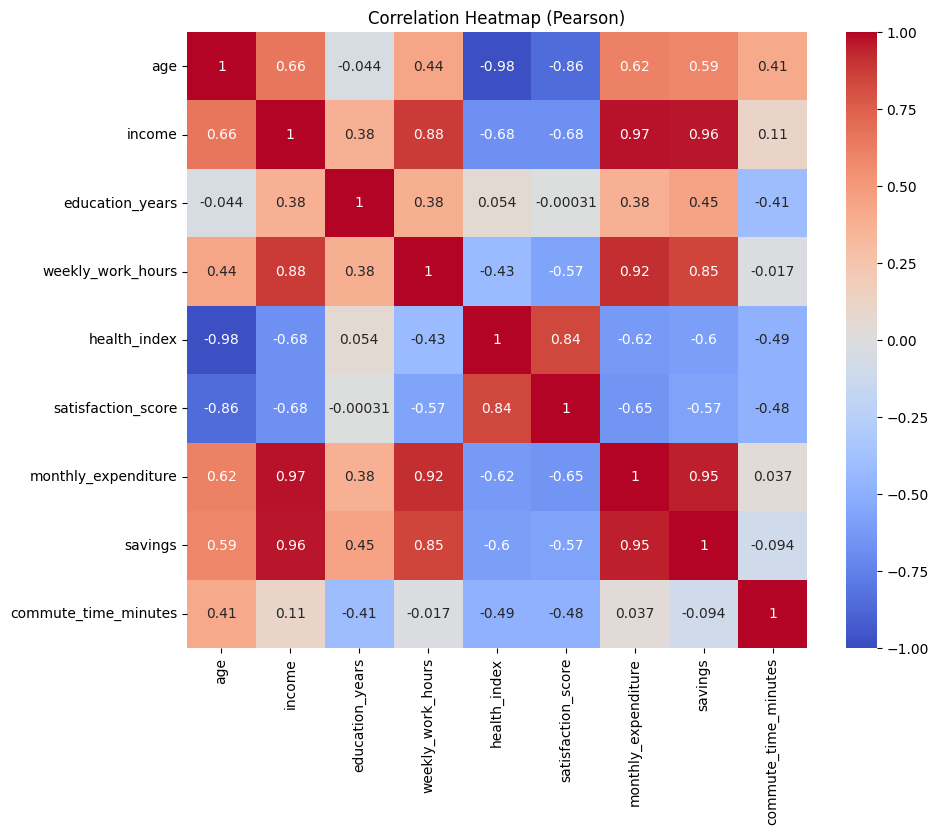

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Pearson)")
plt.show()


## Step 10. Linear Regression

We will fit a **simple linear regression** model to predict one feature from  from **one** predictor. In the code below we predic `monthly_expenditure` using `income` as a predictor.

**You are asked to choose two more pairs that you find interesting and repeat the process based on the results presented in the heatmap above by altering the variables `predictor` and `target` of the block below accordingly. The features you can use are:**


*   `id`
*   `age`
*   `income`
*   `education_years`
*   `weekly_work_hours`
*   `health_index`
*   `satisfaction_score`
*   `monthly_expenditure`
*   `savings`
*   `commute_time_minutes`

In [14]:
# Simple linear regression: predict monthly_expenditure from income

predictor = "weekly_work_hours"
target = "savings"

X = df[[predictor]]         # predictor
y = df[target]  # target

linreg_simple = LinearRegression()
linreg_simple.fit(X, y)

print("Intercept:", linreg_simple.intercept_)
print("Slope for income:", linreg_simple.coef_[0])

r2_simple = linreg_simple.score(X, y)
print("R^2 (coefficient of determination):", r2_simple)

Intercept: -8123.921173257054
Slope for income: 392.72224241216395
R^2 (coefficient of determination): 0.7150191652360454


# Step 11. Plot the linear regression

In this step we plot the result of the linear regression of the previous step.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


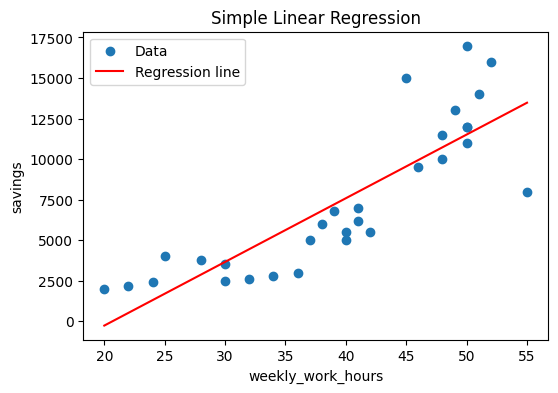

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(df[predictor], df[target], label="Data")
x_vals = np.linspace(df[predictor].min(), df[predictor].max(), 100).reshape(-1, 1)
y_vals = linreg_simple.predict(x_vals)
plt.plot(x_vals, y_vals, color="red", label="Regression line")
plt.xlabel(predictor)
plt.ylabel(target)
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Optional Step 12. Multiple regression

In this step we execute multiple regression and try to predict a feature based on a **set** of features. You need to define a set of predictor features in the variable `features` for the `target` feature. The set must contain at **least two features** separated by commas. You are asked to repeat this process for two other targets of your choice by defining the set of predictors you find most interesting and comment on the results.

In [ ]:
# Multiple linear regression:
# Predict satisfaction_score from several variables

features = [
    "weekly_work_hours",
    "monthly_expenditure",
    "savings", "age"
]

target = "income"

X_multi = df[features]
y = df[target]

linreg_multi = LinearRegression()
linreg_multi.fit(X_multi, y)

print("Intercept:", linreg_multi.intercept_)
print("\nCoefficients:")
for fname, coef in zip(features, linreg_multi.coef_):
    print(f"{fname:20s}: {coef:.4f}")

r2_multi = linreg_multi.score(X_multi, y)
print("\nR^2 (multiple regression):", r2_multi)

Intercept: 2408.528417698093

Coefficients:
weekly_work_hours   : 76.3706
monthly_expenditure : 8.8750
savings             : 1.0068
age                 : 98.0728

R^2 (multiple regression): 0.966153024161447


# Optional Step 13. Computation of new features

In this step we produce new features based on available data. In specific, we estimate the *income_category* of each sample based on the income: when the income is less than 25000 the category is *low* with index 1, when the income is greater or equal to 25000 and less than 45000 the category is *middle* with index 2 and any other case is considered *high* with index 3

In [ ]:
conditions = [
    df['income'] < 25000,
    (df['income'] >= 25000) & (df['income'] < 45000),
    df['income'] >= 45000
]

choices = [1, 2, 3]

df['income_category'] = np.select(conditions, choices)

print("DataFrame with new 'income_category' column:")
display(df.head())

DataFrame with new 'income_category' column:


,id,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes,income_category
0,1,34,28500,14.000,40,0.78,6,1800,5000,45,2
1,2,51,42000,16.000,50,0.66,7,2400,12000,30,2
2,3,22,15000,12.000,20,0.92,8,900,2000,10,1
3,4,47,38000,18.000,55,0.74,5,2600,8000,25,2
4,5,29,32000,24.125,38,0.81,7,1700,6000,50,2


## Optional Step 14. Principal Component Analysis (PCA)

We now reduce the dimensionality of the dataset using PCA. We first,standardize all numeric variables (except `id`) and then apply PCA with **3 components**.


In [ ]:
# Standardize numeric variables

X_all = df[numeric_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
pca_df["income_category"] = df["income_category"]
pca_df.head()

Explained variance ratio: [0.61316687 0.23664752 0.05837694]


,PC1,PC2,PC3,income_category
0,-0.542567,0.578698,-0.281226,2
1,1.879777,-0.584228,-0.009335,2
2,-4.258899,-0.389931,0.372563,1
3,1.916454,-0.840976,-0.032223,2
4,-0.670298,-0.922552,0.982085,2


# Optional Step 15. Plot of Principal Components
In our first attempt, we visualize the dataset in the space of the **first 2 principal components**.

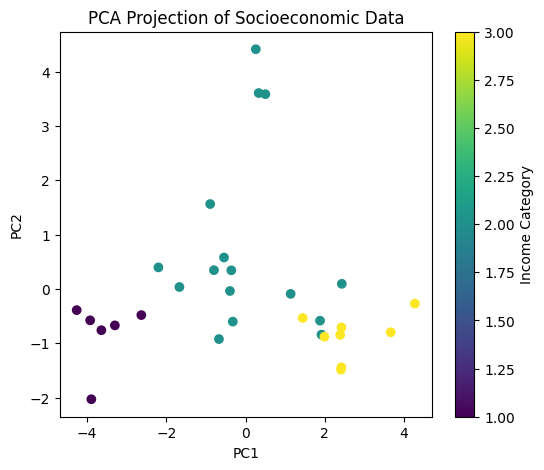

In [ ]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"],
                      c=pca_df["income_category"], cmap="viridis")
plt.colorbar(scatter, label="Income Category")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Socioeconomic Data")
plt.show()


# Optional Step 16. Plot of Principal Components
We then visualize the dataset in the space of the **3 principal components**.

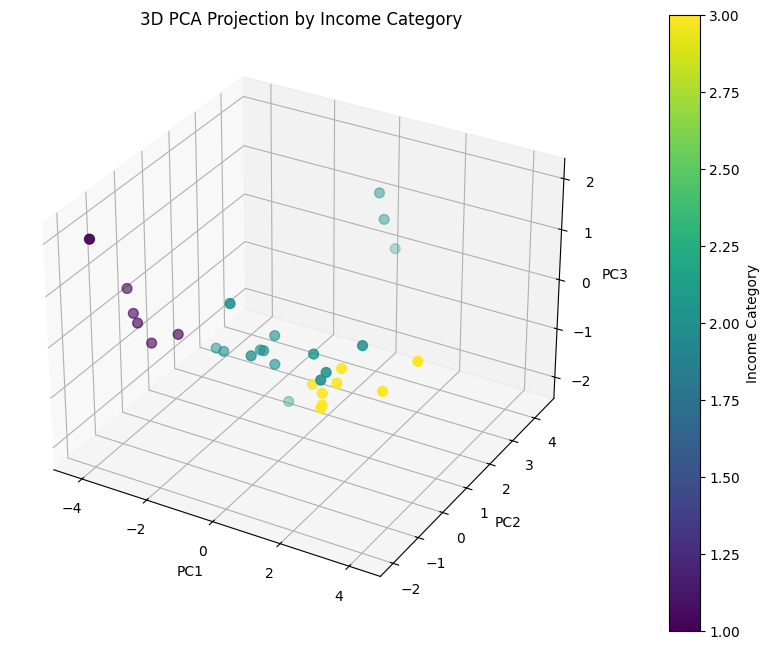

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df["PC1"],
    pca_df["PC2"],
    pca_df["PC3"],
    c=pca_df["income_category"],
    cmap='viridis',
    s=50
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection by Income Category")

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Income Category")

plt.show()

# Optional Step 17. Plot of Principal Components in an interactive 3d Plot
We visualize the dataset in the space of the **3 principal components** using an **inteactive plot** that allows us to have a better overview of the data.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    color='income_category',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Interactive 3D PCA Projection by Income Category')

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

## Optional Step 18. Clustering (k-means)

Finally, we apply **k-means clustering** to the standardized numerical data.

We will:

- choose a value for `k` (e.g., 2 or 3),
- inspect the cluster assignments,
- visualize clusters in the PCA space.


In [ ]:
# Choose number of clusters
k = 4 # you may experiment with 2, 3, 4...

kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters
df[["id", "cluster"] + numeric_cols].head()


,id,cluster,age,income,education_years,weekly_work_hours,health_index,satisfaction_score,monthly_expenditure,savings,commute_time_minutes
0,1,0,34,28500,14.000,40,0.78,6,1800,5000,45
1,2,1,51,42000,16.000,50,0.66,7,2400,12000,30
2,3,2,22,15000,12.000,20,0.92,8,900,2000,10
3,4,1,47,38000,18.000,55,0.74,5,2600,8000,25
4,5,0,29,32000,24.125,38,0.81,7,1700,6000,50


# Optional Step 19. Plot in a 2d Plot

We plot the estimated classes of the clusters in a 2d plot using the first 2 componentes of the PCA.

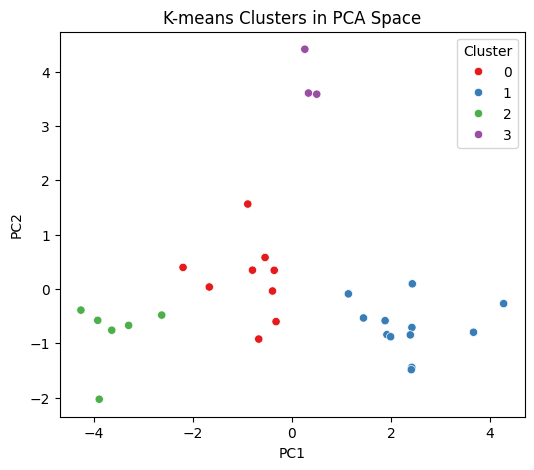

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(
    x=pca_df["PC1"], y=pca_df["PC2"],
    hue=df["cluster"].astype(str),
    palette="Set1"
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means Clusters in PCA Space")
plt.legend(title="Cluster")
plt.show()


# Optional Step 20. Plot in a 3d Plot

We visualize the data in a 3d plot.

In [ ]:
import plotly.express as px

# Ensure 'cluster' column is in pca_df for coloring, if not already present
# If df['cluster'] exists and pca_df does not, add it
if 'cluster' not in pca_df.columns:
    pca_df['cluster'] = df['cluster']

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    color='cluster',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Interactive 3D PCA Projection by K-Means Cluster')

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()

# Optional Step 21. Crosstabulation of the classification results

For a better understanding of the classification results we produce the crosstabulation of the clusters

In [ ]:
import pandas as pd

crosstab_results = pd.crosstab(df['income_category'], df['cluster'], rownames=['Income Category'], colnames=['Cluster'])
print("Crosstabulation of Income Category vs. Cluster:")
display(crosstab_results)

Crosstabulation of Income Category vs. Cluster:


Cluster,0,1,2,3
Income Category,,,,
1,0,0,6,0
2,9,4,0,3
3,0,8,0,0
